In [ ]:
#importer les packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [ ]:
#lire
df=pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df

In [ ]:
pd.set_option('display.max_rows',df.shape[0]+1)
df

In [ ]:
pd.set_option('display.max_rows',10)
df

In [ ]:
#les valeurs manquantes
df.info()
df

In [ ]:
df.describe(include=['O'])

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
from math import nan
if object==nan:
  print("true")
else:
   print("No")

No


In [ ]:
#renseigner les valeurs
cat_data = []
num_data = []
for i,c in enumerate(df.dtypes):
  if c==object:
    cat_data.append(df.iloc[:,i])
  else:
      num_data.append(df.iloc[:,i])
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [ ]:
num_data

In [ ]:
cat_data

In [ ]:
#pour les vzriables categoriques on va renplacer les valeurs manquantes pare les valeurs repetitives
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [ ]:
#pour les vzriables categoriques on va renplacer les valeurs manquantes pare les valeurs repetitives
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any()

In [ ]:
target_value = {'Y': 1, 'N': 0}
target = cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target = target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
#Supprimer loan_id
cat_data.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
#concatener cat_data et spécifier la colonne target
X=pd.concat([cat_data,num_data],axis=1)
y = target
target.value_counts()

In [1]:
#bases de données utilidées pour l'analyses opératoitrs 
df=pd.concat([cat_data,num_data,target],axis=1)

NameError: ignored

le pourecentage des crédits accord est: 0.3127035830618892
le pourecentage des crédits non ccord est: 0.6872964169381107


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


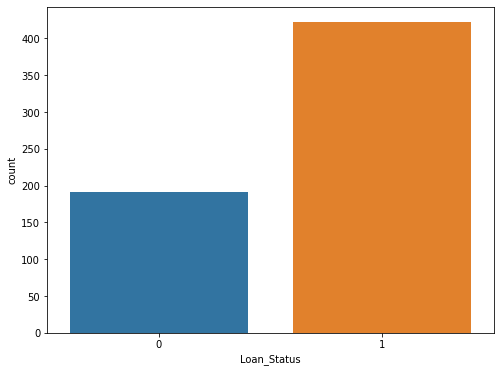

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(target)
yes = target.value_counts()[0]/len(target)
no = target.value_counts()[1]/len(target)
print(f'le pourecentage des crédits accord est: {yes}')
print(f'le pourecentage des crédits non ccord est: {no}')

In [ ]:
grid = sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Credit_History')